# Домашняя работа №2

In [33]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

#### Генеральная совокупность - это все возможное множетво значений какой-то величины
#### Выборка - ее часть, которую мы можем наблюдать и измерять

- Если размер выборки больше 200, то такая выборка является репрезентативной?

#### Вопрос не корректный. 
#### Выборка, чтобы считаться репрезентативной, должна обладать всеми признаками генеральной совокупности.
#### При этом признаки должны быть распределены в таком же соотношении, как в этой генеральной совокупности.

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

#### 1. Длины волос игроков всех команд, приехавших на ЧМ
#### 2. Длины волос игроков всех команд из стран Западной Европы, приехавших на ЧМ
#### 3. Длины волос игроков французской команды за все Чемпионаты

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

#### Взять выборку за конкретный год (например 2017)
#### Взять выборку из весов детей, родившихся каждое первое число каждого месяца (примерно 12/365 от генеральной совокупности)

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # библиотека для задания случайных величин
%matplotlib inline

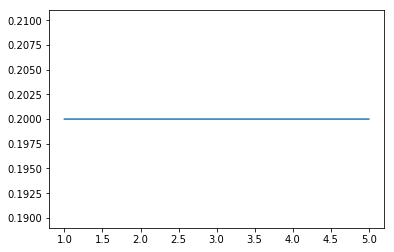

In [99]:
a = 1
b = 5

x = np.linspace(a, b, 7500)
pdf = uniform_rv.pdf(x) # плотность распределения вероятностей
plt.plot(x, pdf)


- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [22]:
gamma_rv = sts.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[26]
mean = sample.mean()


In [23]:
# посмотрим на медиану
med

3.501238693829297

In [24]:
# посмотрим на матож
mean

3.9948769506412782

In [25]:
#пусть выброс будет равен 9
overshoot = 50
sample[50] = overshoot


In [26]:
from copy import copy
sample_with_overshoot = copy(sample)
new_med = sorted(sample_with_overshoot)[25]
new_mean = sample_with_overshoot.mean()

In [27]:
# посмотрим на новую медиану. Она не поменялась
new_med

3.501238693829297

In [28]:
new_med == med

True

In [29]:
# посмотрим на новое мат ожидание.
new_mean

4.907537561824016

In [30]:
# значение выросло на 
new_mean - mean

0.912660611182738

#### Вывод: выброс, какой бы он ни был, при неизменном количестве элементов в массиве не влияет на медиану. По обе стороны от нее по половине значений
#### А среднее значение будет отклоняться в сторону выброса тем сильнее, чем больше выброс.

- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [113]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
mean_with_c = (sample + C).mean()
mean_mult_c = (sample * C).mean()

In [114]:
sample

array([1, 1, 2, 1, 1, 3, 4, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 3, 1, 2, 2, 5,
       2, 3, 5, 0, 2, 2, 1, 0, 1, 1, 4, 1, 3, 2, 2, 3, 1, 1, 4, 3, 4, 2,
       1, 2, 0, 1, 2, 1, 2, 5, 1, 2, 1, 4, 2, 1, 4, 2, 5, 1, 1, 0, 3, 3,
       1, 1, 1, 4, 3, 1, 0, 1, 3, 1, 3, 2, 2, 0, 4, 2, 1, 6, 1, 4, 4, 3,
       2, 2, 1, 4, 0, 2, 4, 2, 2, 0, 1, 3])

In [115]:
sample + C

array([1.5, 1.5, 2.5, 1.5, 1.5, 3.5, 4.5, 1.5, 0.5, 2.5, 0.5, 0.5, 2.5,
       1.5, 1.5, 1.5, 2.5, 3.5, 1.5, 2.5, 2.5, 5.5, 2.5, 3.5, 5.5, 0.5,
       2.5, 2.5, 1.5, 0.5, 1.5, 1.5, 4.5, 1.5, 3.5, 2.5, 2.5, 3.5, 1.5,
       1.5, 4.5, 3.5, 4.5, 2.5, 1.5, 2.5, 0.5, 1.5, 2.5, 1.5, 2.5, 5.5,
       1.5, 2.5, 1.5, 4.5, 2.5, 1.5, 4.5, 2.5, 5.5, 1.5, 1.5, 0.5, 3.5,
       3.5, 1.5, 1.5, 1.5, 4.5, 3.5, 1.5, 0.5, 1.5, 3.5, 1.5, 3.5, 2.5,
       2.5, 0.5, 4.5, 2.5, 1.5, 6.5, 1.5, 4.5, 4.5, 3.5, 2.5, 2.5, 1.5,
       4.5, 0.5, 2.5, 4.5, 2.5, 2.5, 0.5, 1.5, 3.5])

In [116]:
sample * C

array([0.5, 0.5, 1. , 0.5, 0.5, 1.5, 2. , 0.5, 0. , 1. , 0. , 0. , 1. ,
       0.5, 0.5, 0.5, 1. , 1.5, 0.5, 1. , 1. , 2.5, 1. , 1.5, 2.5, 0. ,
       1. , 1. , 0.5, 0. , 0.5, 0.5, 2. , 0.5, 1.5, 1. , 1. , 1.5, 0.5,
       0.5, 2. , 1.5, 2. , 1. , 0.5, 1. , 0. , 0.5, 1. , 0.5, 1. , 2.5,
       0.5, 1. , 0.5, 2. , 1. , 0.5, 2. , 1. , 2.5, 0.5, 0.5, 0. , 1.5,
       1.5, 0.5, 0.5, 0.5, 2. , 1.5, 0.5, 0. , 0.5, 1.5, 0.5, 1.5, 1. ,
       1. , 0. , 2. , 1. , 0.5, 3. , 0.5, 2. , 2. , 1.5, 1. , 1. , 0.5,
       2. , 0. , 1. , 2. , 1. , 1. , 0. , 0.5, 1.5])

In [118]:
print(f'mean={mean}, mean_with_c ={mean_with_c}, mean_mult_c = {mean_mult_c}')

mean=1.98, mean_with_c =2.48, mean_mult_c = 0.99


In [ ]:
# Добавление константы к значениям элементов массива смещает мат ожидание на величину этой константы
# Аналогично с операцией умножения.

- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [137]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = 9

In [138]:
# посмотрим на sample
sample

array([4.06126234, 4.35571441, 4.36974281, 6.10274132, 4.3999212 ,
       4.5454776 , 4.36215132, 5.16420677, 4.98839582, 4.74809289,
       4.04041821, 6.41733477, 4.10822624, 5.55321447, 4.97458238,
       6.1541647 , 4.23250976, 4.62982813, 7.39369586, 4.44568332,
       4.2972753 , 4.01211551, 4.98149396, 4.08146153, 4.08627887,
       9.3689844 , 4.09326141, 4.61030809, 4.7924637 , 5.10890563,
       5.6156065 , 4.43315854, 6.09901261, 6.68497372, 4.47344291,
       5.82123775, 4.41032572, 4.06613673, 5.23219852, 4.4492847 ,
       4.67795062, 4.44731892, 4.01896399, 7.03296917, 5.09812816,
       4.22209634, 4.13197833, 5.1600138 , 5.27063177, 6.25217622])

In [139]:
# создадим новый массив с помощью copy
sample_with_overshoot = copy(sample)

In [143]:
# пусть элементы 4-й, 6-й и 36-й будут выбросами
sample_with_overshoot[[5,7,37]]

array([4.5454776 , 5.16420677, 4.06613673])

In [144]:
sample_with_overshoot[[5,7,37]] = overshoot

In [145]:
# проверим, появились ли выбросы
sample_with_overshoot

array([4.06126234, 4.35571441, 4.36974281, 6.10274132, 4.3999212 ,
       9.        , 4.36215132, 9.        , 4.98839582, 4.74809289,
       4.04041821, 6.41733477, 4.10822624, 5.55321447, 4.97458238,
       6.1541647 , 4.23250976, 4.62982813, 7.39369586, 4.44568332,
       4.2972753 , 4.01211551, 4.98149396, 4.08146153, 4.08627887,
       9.3689844 , 4.09326141, 4.61030809, 4.7924637 , 5.10890563,
       5.6156065 , 4.43315854, 6.09901261, 6.68497372, 4.47344291,
       5.82123775, 4.41032572, 9.        , 5.23219852, 4.4492847 ,
       4.67795062, 4.44731892, 4.01896399, 7.03296917, 5.09812816,
       4.22209634, 4.13197833, 5.1600138 , 5.27063177, 6.25217622])

In [146]:
# дисперсия нового массива с выбросами
new_var = sample_with_overshoot.var()
new_var

1.970746836423141

In [147]:
# дисперсия первоначального массива без выбросов
var

1.1036315880044598

In [ ]:
# видим, что три крупных выброса существенно повлияли на величину дисперсии

- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s^2, \bar{X}+s^2)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

Вспомним формулы:

#### Выборочная дисперсия

$$s^2 = \frac{1}{n-1} \sum_i (X_i - \bar{X})^2 $$

**Интерквартильный размах** 
$$IQR  = X_{0.75} - X_{0.25} $$

#### Матожидание

$$\bar{X} = \frac 1n \sum_i X_i - \text{выборочное среднее} $$

In [152]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)


In [160]:
# отсортируем выборку
sorted_sample = sorted(sample)

In [162]:
# найдем 75-й квартиль
sorted_sample[:int(len(sample)/4 * 3 + 1)]

[0.09287749424256697,
 0.11066467564923199,
 0.2753799121593965,
 0.338921670882518,
 0.4693915235538735,
 0.5646475546955965,
 0.6275567180974613,
 0.6323325806441731,
 0.6375938150358462,
 0.6535777555294868,
 0.686728171040766,
 0.6920860462065792,
 0.7105759456592029,
 0.7164825755194442,
 0.7604758707936154,
 0.7803410042003569,
 0.7925663329806749,
 0.795656178250443,
 0.8357248074676122,
 0.8686012402342609,
 0.8793206041839348,
 0.8898849715691308,
 0.9371404463452979,
 0.9567219365091604,
 0.9705954962773866,
 0.9970613413069116,
 1.010255949924647,
 1.0130763589015512,
 1.0582315919275291,
 1.090268661717479,
 1.114889773359133,
 1.1264692864154298,
 1.1269630297967101,
 1.1385509496326933,
 1.1595807116009218,
 1.1647838642834023,
 1.1711035152620684,
 1.1742605901019914,
 1.182014843634568,
 1.1847079038168848,
 1.1917746907295899,
 1.1948166706083523,
 1.2035158174036793,
 1.207963749823337,
 1.2083978936876474,
 1.2217329940446973,
 1.235528514321589,
 1.2406494386030449,

In [164]:
# найдем 25-й квартиль
sorted_sample[:int(len(sample)/4+1)]

[0.09287749424256697,
 0.11066467564923199,
 0.2753799121593965,
 0.338921670882518,
 0.4693915235538735,
 0.5646475546955965,
 0.6275567180974613,
 0.6323325806441731,
 0.6375938150358462,
 0.6535777555294868,
 0.686728171040766,
 0.6920860462065792,
 0.7105759456592029,
 0.7164825755194442,
 0.7604758707936154,
 0.7803410042003569,
 0.7925663329806749,
 0.795656178250443,
 0.8357248074676122,
 0.8686012402342609,
 0.8793206041839348,
 0.8898849715691308,
 0.9371404463452979,
 0.9567219365091604,
 0.9705954962773866,
 0.9970613413069116,
 1.010255949924647,
 1.0130763589015512,
 1.0582315919275291,
 1.090268661717479,
 1.114889773359133,
 1.1264692864154298,
 1.1269630297967101,
 1.1385509496326933,
 1.1595807116009218,
 1.1647838642834023,
 1.1711035152620684,
 1.1742605901019914,
 1.182014843634568,
 1.1847079038168848,
 1.1917746907295899,
 1.1948166706083523,
 1.2035158174036793,
 1.207963749823337,
 1.2083978936876474,
 1.2217329940446973,
 1.235528514321589,
 1.2406494386030449,

In [186]:
# найдем разность 75-й квартиль минус 25-й квартиль (что и является интерквартильным размахом)
sorted(list(set(sorted_sample[:int(len(sample)/4 * 3 + 1)]) - set(sorted_sample[:int(len(sample)/4+1)])));

In [177]:
# просуммируем значения списка
sum(sorted(list(set(sorted_sample[:int(len(sample)/4 * 3 + 1)]) - set(sorted_sample[:int(len(sample)/4+1)]))))

1455.207243920815

In [ ]:
# теперь найдем размах матожидание минус выборочная дисперсия / матожидание минус выборочная дисперсия

#### Выборочная дисперсия

$$s^2 = \frac{1}{n-1} \sum_i (X_i - \bar{X})^2 $$

In [183]:
# считаем выборочную дисперсию S2
disp = [(s-3)**2 for s in sample]
S2 = sum(disp) / (len(sample) - 1)
S2

0.9686611948057182

In [184]:
# находим граница интервала
int1 = 3 - S2
int2 = 3 + S2
print(int1, int2)

2.031338805194282 3.968661194805718


In [188]:
# считаем сумму значений выборки в пределах интервала
list1 = []
for s in sorted(sample):
    if s >= int1 and  s <= int2:
        list1.append(s)
sum(list1)

1993.0836015576654

In [ ]:
# используем калькулятор https://gallery.shinyapps.io/dist_calc/
# интервал от 2.03 до 3.96 содержит примерно 70% значений. Сумма значений равна 1993
# интерквантильный размах, как и ожидалось в теории, содержит 50% значений. Сумма значений равна 1455

#Вывод ниже:

$(\bar{X}-s^2, \bar{X}+s^2)$ для $\mathcal{N}(a, \sigma^2)$ шире, чем интерквантильный размах ($X_{0.75} - X_{0.25}$).

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [194]:
beta_rv = stats.beta(1,3)
#your code here
# посчитаем моду
sample_beta = beta_rv.rvs(1000)
sorted(sample_beta)[len(sample_beta)//2]

0.20018110553356752

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [195]:
gamma_rv = stats.gamma(2,2)
sample_gamma = gamma_rv.rvs(500)

#your code here
mean = sum(sample_gamma)/len(sample_gamma)
var = 1 / (len(sample_gamma) - 1) * np.sum([(sample_gamma[i] - mean)**2 for i in range(len(sample_gamma))])
med = sorted(sample_gamma)[len(sample_gamma)//2]


In [196]:
print(f"mean: {mean}")
print(f"var : {var}")
print(f"median : {med}")


mean: 3.918167898763364
var : 1.6307497593944427
median : 3.64412220680206


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

In [34]:
#your code here
norm_rv = stats.norm(5,2)
mean_norm_samples = [] # пустой словарь, в которы поместим полученные средние
for i in range(10000):
    sample = norm_rv.rvs(50)
    #your code here
    mean_norm_sample = sum(sample)/len(sample)
    mean_norm_samples.append(mean_norm_sample)

In [35]:
mean_norm_samples;

In [36]:
len(mean_norm_samples) # проверим, что число значений равно числу случайных 50-ти элементных выборок

10000

(array([  1.,  11.,  15.,  18.,  29.,  81., 143., 184., 296., 440., 538.,
        707., 841., 904., 927., 905., 943., 808., 683., 504., 369., 263.,
        164.,  97.,  62.,  42.,  13.,   7.,   3.,   2.]),
 array([3.98017591, 4.04915423, 4.11813255, 4.18711087, 4.25608919,
        4.32506751, 4.39404583, 4.46302416, 4.53200248, 4.6009808 ,
        4.66995912, 4.73893744, 4.80791576, 4.87689408, 4.9458724 ,
        5.01485072, 5.08382905, 5.15280737, 5.22178569, 5.29076401,
        5.35974233, 5.42872065, 5.49769897, 5.56667729, 5.63565562,
        5.70463394, 5.77361226, 5.84259058, 5.9115689 , 5.98054722,
        6.04952554]),
 <a list of 30 Patch objects>)

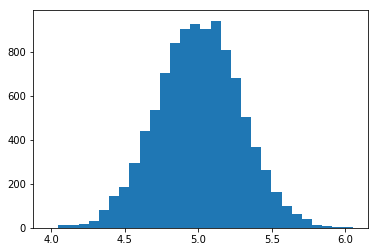

In [37]:
#посмотрим на распределение средних. Напоминает нормальное распределение
plt.hist(mean_norm_samples, bins=30)


(array([1.000e+00, 3.000e+00, 7.000e+00, 1.100e+01, 4.200e+01, 5.500e+01,
        1.120e+02, 2.050e+02, 2.830e+02, 4.500e+02, 6.480e+02, 8.060e+02,
        9.460e+02, 1.054e+03, 1.043e+03, 9.940e+02, 9.490e+02, 7.540e+02,
        5.940e+02, 3.970e+02, 2.750e+02, 1.690e+02, 9.100e+01, 6.900e+01,
        2.000e+01, 1.200e+01, 4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00]),
 array([4.65237143, 4.67646584, 4.70056024, 4.72465465, 4.74874906,
        4.77284346, 4.79693787, 4.82103228, 4.84512668, 4.86922109,
        4.8933155 , 4.9174099 , 4.94150431, 4.96559872, 4.98969312,
        5.01378753, 5.03788194, 5.06197634, 5.08607075, 5.11016516,
        5.13425956, 5.15835397, 5.18244838, 5.20654278, 5.23063719,
        5.2547316 , 5.278826  , 5.30292041, 5.32701482, 5.35110922,
        5.37520363]),
 <a list of 30 Patch objects>)

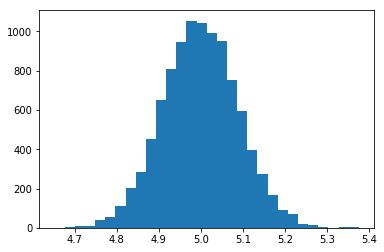

In [43]:
# чем бОльшего размера случайным образом сформированные выборки мы будем брать, тем распределение средних будет 
# создавать более узкий (относительно значения матожидания среднего) колоколообразный график

norm_rv = stats.norm(5,2)
mean_norm_samples = [] # пустой словарь, в который поместим полученные средние
for i in range(10000):
    sample = norm_rv.rvs(500)
    mean_norm_sample = sum(sample)/len(sample)
    mean_norm_samples.append(mean_norm_sample)
plt.hist(mean_norm_samples, bins=30)

(array([   4.,    8.,    8.,   25.,   39.,   70.,  130.,  228.,  312.,
         447.,  618.,  752.,  901.,  928.,  996., 1007.,  901.,  742.,
         585.,  449.,  338.,  218.,  125.,   74.,   55.,   18.,    9.,
           5.,    4.,    4.]),
 array([3.50739454, 3.54141188, 3.57542922, 3.60944656, 3.64346391,
        3.67748125, 3.71149859, 3.74551593, 3.77953327, 3.81355061,
        3.84756796, 3.8815853 , 3.91560264, 3.94961998, 3.98363732,
        4.01765467, 4.05167201, 4.08568935, 4.11970669, 4.15372403,
        4.18774137, 4.22175872, 4.25577606, 4.2897934 , 4.32381074,
        4.35782808, 4.39184542, 4.42586277, 4.45988011, 4.49389745,
        4.52791479]),
 <a list of 30 Patch objects>)

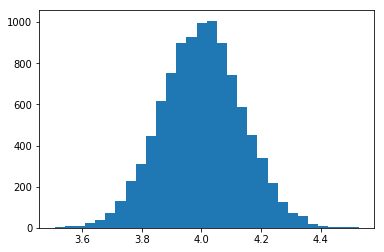

In [45]:
# нормальное распределение с параметрами (5,2) означает, что среднее значение (наиболее вероятное) равно 5, а стандартное отклонение равно 2
# какими бы ни были параметры генеральной совокупности, согласно ЦПТ средние значения выборок из нее будут распределены примерно по нормальному закону 

norm_rv = stats.norm(4,3)
mean_norm_samples = [] # пустой словарь, в который поместим полученные средние
for i in range(10000):
    sample = norm_rv.rvs(500)
    mean_norm_sample = sum(sample)/len(sample)
    mean_norm_samples.append(mean_norm_sample)
plt.hist(mean_norm_samples, bins=30)

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

(array([2., 2., 2., 8., 9., 6., 3., 4., 3., 2., 2., 0., 3., 2., 2.]),
 array([3.44553241, 3.54207116, 3.63860992, 3.73514868, 3.83168744,
        3.92822619, 4.02476495, 4.12130371, 4.21784247, 4.31438122,
        4.41091998, 4.50745874, 4.60399749, 4.70053625, 4.79707501,
        4.89361377]),
 <a list of 15 Patch objects>)

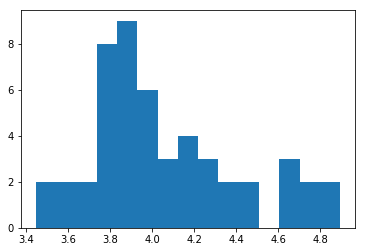

In [50]:
# для экспоненциального распределения сделаем всего 50 выборок малого размера (10 элементов)
norm_rv = stats.expon(3)
mean_norm_samples = [] # пустой словарь, в который поместим полученные средние
for i in range(50):
    sample = norm_rv.rvs(10)
    mean_norm_sample = sum(sample)/len(sample)
    mean_norm_samples.append(mean_norm_sample)
plt.hist(mean_norm_samples, bins=15)
# результат не похож на нормальное рапределение

- Сделайте z-преобразование для данного распределения

In [52]:
expon_rv = stats.expon(3)
sample_expon = expon_rv.rvs(500)
var_sample_expon = sample_expon.var()
mean_sample_expon = sample_expon.mean()
new_rv = [(x - mean_sample_expon)/ var_sample_expon for x in sample_expon] 
new_rv


[-0.6240738803691079,
 -0.7466561689383119,
 0.4008345229639423,
 -0.7058170862833295,
 2.135095197732059,
 -0.6851329083678626,
 -0.430063604287842,
 -0.6388560334452905,
 -0.7394329048836833,
 1.8570597693736972,
 1.7117789924792741,
 -0.5606465853120859,
 2.2138181048804193,
 -0.7118690873077284,
 -0.38085851307769886,
 2.009236092959351,
 -0.3561220019636092,
 -0.29512959582869847,
 -0.16068096423416514,
 0.4318326645239014,
 -0.5065648922341582,
 0.1816831714148168,
 -0.31801559661507783,
 -0.44683918541476103,
 0.2917596917880456,
 0.3583679175324292,
 0.020099477436607345,
 -0.7686817983123199,
 -0.2109985317350491,
 -0.7839234907907315,
 -0.22500468563367337,
 -0.8533638723001259,
 -0.5272234641598471,
 0.0017054796244090856,
 -0.6987136557942516,
 -0.4391232386209474,
 0.39022863673325836,
 4.166099740973924,
 1.379206641861178,
 -0.4512425512404252,
 -0.41296193638545364,
 0.10672640859133566,
 0.2383926366285786,
 -0.7757739739090089,
 0.46168005207938284,
 -0.46014183860768

In [63]:
# новый матож
new_mean = sum(new_rv)/len(new_rv)
new_mean

-7.543965452327939e-17

In [64]:
# новая дисперсия
1 / (len(new_rv) - 1) * np.sum([(new_rv[i] - new_mean)**2 for i in range(len(new_rv))])


0.8497004643577274

In [65]:
# првоерим себя
np.var(new_rv)

0.848001063429012

## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [102]:
# будем работать с new_rv
# нужно найти квантиль уровня 90%
sorted(new_rv)[int(len(new_rv_sort)*0.9)]

1.2660668609201893

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [106]:
t_rv = sts.t(15)
t_rv.ppf(0.9)


1.3406056078504547

In [ ]:
# Distribution Calculator показывает интервал 0.8

In [110]:
t_rv = sts.t(15)
t_rv.ppf(0.95)

1.7530503556925547

In [ ]:
# Distribution Calculator показывает интервал 0.9
# при уровне доверия 95% интервал шире

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [213]:
norm_rv = stats.norm(0, 2)
#your code here
sample_norm_1 = norm_rv.rvs(200)
sample_norm_2 = norm_rv.rvs(100)
# строим доверительные интервалы в две сигмы, т.к. 90% интервал непонятно как построить
mean_sample_norm_1 = sample_norm_1.mean()
var_sample_norm_1 = sample_norm_1.var()
se_sample_norm_1 = var_sample_norm_1 / (len(sample_norm_1)**0.5)

mean_sample_norm_2 = sample_norm_2.mean()
var_sample_norm_2 = sample_norm_2.var()
se_sample_norm_2 = var_sample_norm_2 / (len(sample_norm_2)**0.5)

print(f'left bound 1 = {mean_sample_norm_1 - 2*se_sample_norm_1}, right bound 1 = {mean_sample_norm_1 + 2*se_sample_norm_1}' )
print(f'left bound 2 = {mean_sample_norm_2 - 2*se_sample_norm_2}, right bound 1 = {mean_sample_norm_2 + 2*se_sample_norm_2}' )


left bound 1 = -0.2505157122904329, right bound 1 = 0.6911238128281444
left bound 2 = -0.4824099253638432, right bound 1 = 0.9780975292574114


In [ ]:
# ответ: у меньшей выборки доверительный интервал уже

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [111]:
#your answer here
# ложноотрицательный вывод

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем сильнее получаемые различия.


In [211]:
#your answer here
# Верное рассуждение: Если бы в исследовании мы получили  p=0,9 , это означало бы, что верна нулевая гипотеза.
# Иными словами p value это вероятность встретить близкий результат при повторной выборке, если нулевая гипотеза верна.


- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99\% доверительный интервал хорошей оценкой в общем случае?

In [112]:
#your answer here
# Ответы:
# Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? - 0.01
# Является ли 99% доверительный интервал хорошей оценкой в общем случае? - нет

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

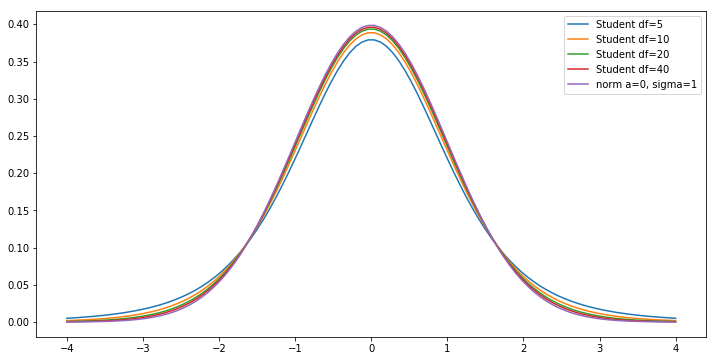

In [214]:
#your code here
import scipy.stats as sts
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t_rv_1 = sts.t(5)
t_rv_2 = sts.t(10)
t_rv_3 = sts.t(20)
t_rv_4 = sts.t(40)
norm_rv = sts.norm(0, 1)


x = np.linspace(-4, 4, 100)
plt.figure(figsize=(12,6))

pdf_1 = t_rv_1.pdf(x)
plt.plot(x, pdf_1)

pdf_2 = t_rv_2.pdf(x)
plt.plot(x, pdf_2)

pdf_3 = t_rv_3.pdf(x)
plt.plot(x, pdf_3)

pdf_4 = t_rv_4.pdf(x)
plt.plot(x, pdf_4)

pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)


plt.legend(['Student df=5', 'Student df=10', 'Student df=20', 'Student df=40', 'norm a=0, sigma=1'])

In [ ]:
# чем меньше степень свободы, тем больше дисперсия и на концах графика значения плотности будут больше (синий график выше остальных)

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [217]:
#your code here
u = np.linspace(0, 10, 100)
u

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [218]:
p = np.linspace(0, -10, 100)
p

array([  0.        ,  -0.1010101 ,  -0.2020202 ,  -0.3030303 ,
        -0.4040404 ,  -0.50505051,  -0.60606061,  -0.70707071,
        -0.80808081,  -0.90909091,  -1.01010101,  -1.11111111,
        -1.21212121,  -1.31313131,  -1.41414141,  -1.51515152,
        -1.61616162,  -1.71717172,  -1.81818182,  -1.91919192,
        -2.02020202,  -2.12121212,  -2.22222222,  -2.32323232,
        -2.42424242,  -2.52525253,  -2.62626263,  -2.72727273,
        -2.82828283,  -2.92929293,  -3.03030303,  -3.13131313,
        -3.23232323,  -3.33333333,  -3.43434343,  -3.53535354,
        -3.63636364,  -3.73737374,  -3.83838384,  -3.93939394,
        -4.04040404,  -4.14141414,  -4.24242424,  -4.34343434,
        -4.44444444,  -4.54545455,  -4.64646465,  -4.74747475,
        -4.84848485,  -4.94949495,  -5.05050505,  -5.15151515,
        -5.25252525,  -5.35353535,  -5.45454545,  -5.55555556,
        -5.65656566,  -5.75757576,  -5.85858586,  -5.95959596,
        -6.06060606,  -6.16161616,  -6.26262626,  -6.36

Text(0.5,0,'выборка u')

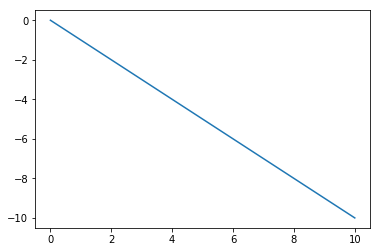

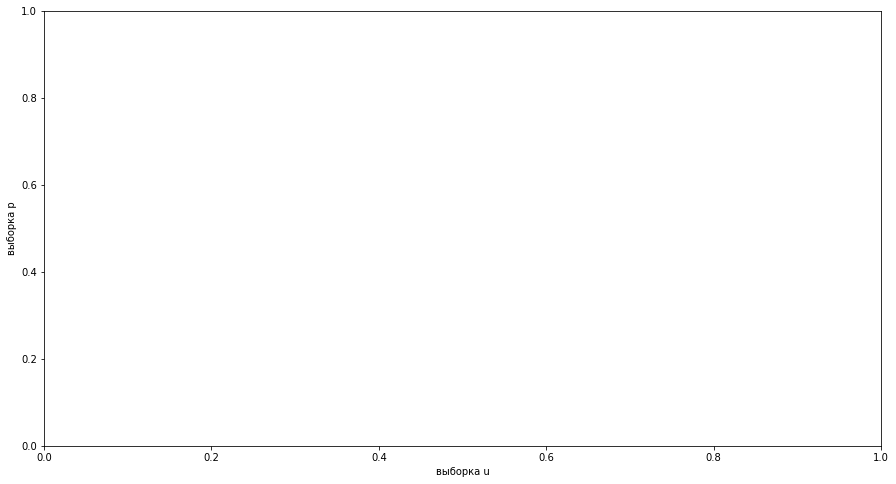

In [234]:
plt.plot(u, p)
plt.figure(figsize=(15, 8))
plt.ylabel('выборка p')
plt.xlabel('выборка u')

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

In [ ]:
#your code here
# нужны пояснения, не понял как это сделать

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [114]:
# создадим две выборки по 100 элементов
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
# sample = np.concatenate((sample_1, sample_2))


In [129]:
# мне удобнее работать с датафреймом пандас. Переведем данные в этот объект и добавим поле 'sample_num' - принадлежность к выборке 1 или 2
sample_1_df = pd.DataFrame(sample_1)
sample_1_df['sample_num'] = '1'
sample_2_df = pd.DataFrame(sample_2)
sample_2_df['sample_num'] = '2'

In [ ]:
# соединим два датафрейма по axis=0
sample_df = pd.concat([sample_1_df, sample_2_df], axis=0)

In [138]:
# отсортируем по значению
sample_df.sort_values(by = [0]).head()

,0,sample_num
77,-0.635933,2
62,-0.540160,1
9,0.040549,1
45,0.119633,2
95,0.544121,1


In [139]:
# сбросим индексы
sample_df.sort_values(by = [0]).reset_index().head()

,index,0,sample_num
0,77,-0.635933,2
1,62,-0.540160,1
2,9,0.040549,1
3,45,0.119633,2
4,95,0.544121,1


In [158]:
# назовем объединенный и отсортированный датафрейм df
df = sample_df.sort_values(by = [0]).reset_index()
df[df['sample_num'] == '1'].head(10)

,index,0,sample_num
1,62,-0.540160,1
2,9,0.040549,1
4,95,0.544121,1
5,65,0.689519,1
8,34,0.809592,1
9,64,0.847215,1
10,79,0.945152,1
11,17,1.050007,1
14,92,1.290672,1
15,69,1.347513,1


In [160]:
# отфильтруем индексы, принадлежащие значениям из первой ввыборки и вычислим их сумму
sum(df['index'][df['sample_num'] == '1'])

4950

In [161]:
# отфильтруем индексы, принадлежащие значениям из второй ввыборки и вычислим их сумму
sum(df['index'][df['sample_num'] == '2'])

4950